## Data Assessment using Python Libraries

In [3]:
#importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pyarrow
import graphviz

In [ ]:
# Load datasets
patients = pd.read_csv(r"C:\Users\ABHISHEK BANKAWAT\Desktop\Data_Engineering_Task\Dataset\patients.csv")
conditions = pd.read_excel(r"C:\Users\ABHISHEK BANKAWAT\Desktop\Data_Engineering_Task\Dataset\conditions.xlsx")
encounters = pd.read_parquet(r"C:\Users\ABHISHEK BANKAWAT\Desktop\Data_Engineering_Task\Dataset\encounters.parquet", engine='pyarrow')
symptoms = pd.read_csv(r"C:\Users\ABHISHEK BANKAWAT\Desktop\Data_Engineering_Task\Dataset\symptoms.csv")
medications = pd.read_csv(r"C:\Users\ABHISHEK BANKAWAT\Desktop\Data_Engineering_Task\Dataset\medications.csv")


### Exploring datasets for Data Quality Issues

#### Patients Dataset

In [25]:
pd.set_option('display.max_columns', None)

In [6]:
patients.shape

(10000, 27)

In [30]:
patients.columns

Index(['PATIENT_ID', 'BIRTHDATE', 'DEATHDATE', 'SSN', 'DRIVERS', 'PASSPORT',
       'PREFIX', 'FIRST', 'LAST', 'SUFFIX', 'MAIDEN', 'MARITAL', 'RACE',
       'ETHNICITY', 'GENDER', 'BIRTHPLACE', 'ADDRESS', 'CITY', 'STATE',
       'COUNTY', 'FIPS', 'ZIP', 'LAT', 'LON', 'HEALTHCARE_EXPENSES',
       'HEALTHCARE_COVERAGE', 'INCOME'],
      dtype='object')

In [7]:
patients.dtypes

PATIENT_ID              object
BIRTHDATE               object
DEATHDATE              float64
SSN                     object
DRIVERS                 object
PASSPORT                object
PREFIX                  object
FIRST                   object
LAST                    object
SUFFIX                  object
MAIDEN                  object
MARITAL                 object
RACE                    object
ETHNICITY               object
GENDER                 float64
BIRTHPLACE              object
ADDRESS                 object
CITY                    object
STATE                   object
COUNTY                  object
FIPS                   float64
ZIP                      int64
LAT                    float64
LON                    float64
HEALTHCARE_EXPENSES    float64
HEALTHCARE_COVERAGE    float64
INCOME                   int64
dtype: object

* we have to convert columns into correct format like datatime, int and string

In [24]:
patients.head(5)

,PATIENT_ID,BIRTHDATE,DEATHDATE,SSN,DRIVERS,PASSPORT,PREFIX,FIRST,LAST,SUFFIX,MAIDEN,MARITAL,RACE,ETHNICITY,GENDER,BIRTHPLACE,ADDRESS,CITY,STATE,COUNTY,FIPS,ZIP,LAT,LON,HEALTHCARE_EXPENSES,HEALTHCARE_COVERAGE,INCOME
0,54f1059e-6250-3949-6dd0-1dda9b85d22a,2002-01-21,NaN,999-28-3364,S99987398,X44428214X,Ms.,Fredricka415,Crist667,NaN,NaN,NaN,white,nonhispanic,NaN,San Antonio Texas US,931 Bartell Ville Apt 84,Fort Worth,Texas,Tarrant County,48439.0,76104,0.329154,-97.399553,9990.08,0.0,35460
1,92675303-ca5b-136a-169b-e764c5753f06,1997-04-16,NaN,999-62-9859,S99999770,X75016560X,Mr.,Lorenzo669,Urrutia540,NaN,NaN,NaN,white,hispanic,NaN,Carolina Puerto Rico PR,386 Altenwerth Orchard Apt 67,Arlington,Texas,Tarrant County,48439.0,76006,0.328145,-97.068885,10936.80,0.0,88407
2,a0b63e97-b6fd-5fe1-8f2d-2bec915efa97,1993-02-04,NaN,999-53-6488,S99979170,X60079936X,Mr.,Luther918,MacGyver246,NaN,NaN,M,white,nonhispanic,NaN,Grand Prairie Texas US,250 Morar Fork Apt 66,Houston,Texas,Harris County,48339.0,77357,0.300834,-95.649706,10662.16,0.0,41800
3,abc59f62-dc5a-5095-1141-80b4ee8be73b,1995-05-23,NaN,999-37-1058,S99981031,X14759314X,Mrs.,Jacque955,Jones311,NaN,Will178,M,white,nonhispanic,NaN,Euless Texas US,492 Keebler Estate,Waco,Texas,McLennan County,48309.0,76655,0.315173,-97.292558,11455.93,0.0,41915
4,28d7b56c-6056-d0a2-2991-39d6e917216c,1993-11-13,NaN,999-31-6091,S99958903,X63033472X,Mrs.,Angela104,Stanton715,NaN,Funk324,M,white,hispanic,NaN,Cibolo Texas US,677 Bosco Extension,Levelland,Texas,Hockley County,48219.0,79336,0.337037,-102.361829,12449.11,0.0,67198


* There is digits in First, maiden and last name which can create problems later so we can standarize the columns to remove digits from names

In [13]:
patients.describe()

,DEATHDATE,GENDER,FIPS,ZIP,LAT,LON,HEALTHCARE_EXPENSES,HEALTHCARE_COVERAGE,INCOME
count,0.0,0.0,9710.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000
mean,NaN,NaN,48188.824717,74947.406200,0.309868,-97.548956,10489.406391,1817.903496,85358.40780
std,NaN,NaN,690.565166,13036.344689,0.020044,2.438536,5256.509164,2462.371193,141329.22638
min,NaN,NaN,35013.000000,0.000000,0.258876,-106.646755,100.000000,0.000000,-986794.00000
25%,NaN,NaN,48113.000000,75904.000000,0.296555,-98.195686,6889.780000,0.000000,25129.25000
50%,NaN,NaN,48201.000000,77099.000000,0.306608,-97.126683,10761.620000,0.000000,51009.50000
75%,NaN,NaN,48355.000000,78260.000000,0.327973,-95.921881,13374.712500,3578.720000,94730.75000
max,NaN,NaN,48507.000000,88063.000000,0.365969,-93.752308,27627.160000,10808.450000,998831.00000


In [29]:
# we have negative values in income column which is a quality issue
negative_income_count = (patients['INCOME'] < 0).sum()
print(negative_income_count)

200


In [11]:
patients.isna().sum()

PATIENT_ID                 0
BIRTHDATE                  0
DEATHDATE              10000
SSN                        0
DRIVERS                 2320
PASSPORT                2961
PREFIX                  2663
FIRST                      0
LAST                       0
SUFFIX                  9941
MAIDEN                  7648
MARITAL                 4146
RACE                       0
ETHNICITY                  0
GENDER                 10000
BIRTHPLACE                 0
ADDRESS                    0
CITY                       0
STATE                      0
COUNTY                     0
FIPS                     290
ZIP                        0
LAT                        0
LON                        0
HEALTHCARE_EXPENSES        0
HEALTHCARE_COVERAGE        0
INCOME                     0
dtype: int64

So we can see in the above output we have missing values in many columns and our gender column in empty so we know where we have missing values in our data and we can move with keeping that in mind

In [ ]:
patients.duplicated()
# patients.duplicated(subset=['PATIENT_ID'])

0       False
1       False
2       False
3       False
4       False
        ...  
9995    False
9996    False
9997    False
9998    False
9999    False
Length: 10000, dtype: bool

We have no duplicates in the dataset

<Axes: title={'center': 'County wise patients'}, xlabel='COUNTY'>

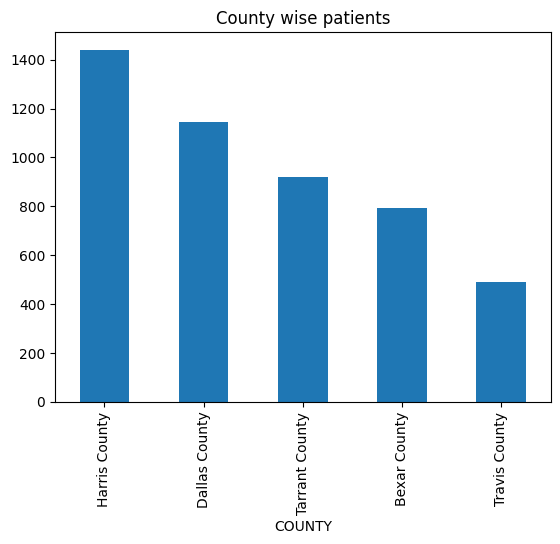

In [20]:
patients['COUNTY'].value_counts()\
        .head(5) \
        .plot(kind='bar',title='County wise patients')

Text(0, 0.5, 'No of patients')

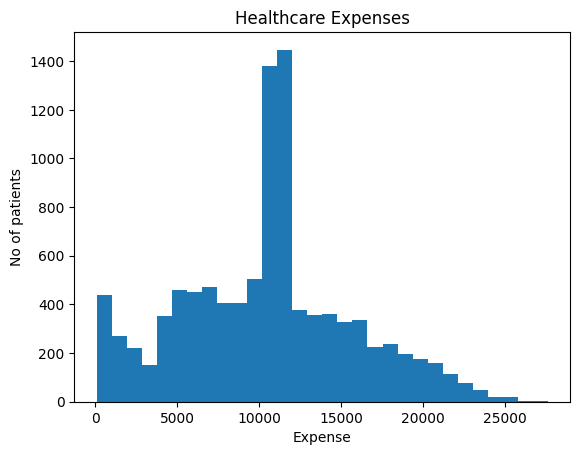

In [25]:
plots = patients['HEALTHCARE_EXPENSES'].plot(kind='hist', bins=30, title='Healthcare Expenses')
plots.set_xlabel('Expense')
plots.set_ylabel('No of patients')

We can see like most of the patients have expenses between 10K to 15K dollars

In [63]:
(patients['COUNTY'].value_counts() == 1).sum()

33

### Issues with patients Dataset
* Proper dtype of column like date, int and float
* Digits in name columns
* 200 negative values in income column

### Conditions Dataset 

In [48]:
conditions.shape

(4149, 6)

In [49]:
conditions.columns

Index(['START', 'STOP', 'PATIENT', 'ENCOUNTER', 'CODE', 'DESCRIPTION'], dtype='object')

In [51]:
conditions.dtypes

START           object
STOP           float64
PATIENT         object
ENCOUNTER       object
CODE             int64
DESCRIPTION     object
dtype: object

In [66]:
conditions.isna().sum()

START             0
STOP           4149
PATIENT           0
ENCOUNTER         0
CODE              0
DESCRIPTION       0
dtype: int64

In [43]:
conditions.head(10)

,START,STOP,PATIENT,ENCOUNTER,CODE,DESCRIPTION
0,2020-04-21,NaN,28D7B56C-6056-D0A2-2991-39D6E917216C,402dfaeb-1888-f562-4651-f75203eb1e28,200936003,Lupus erythematosus
1,2001-11-07,NaN,239AE86A-96DB-6211-9042-D3F2850AABB8,10d39d6f-7d98-8d03-8866-0a7cd363890b,200936003,Lupus erythematosus
2,2001-11-07,NaN,239AE86A-96DB-6211-9042-D3F2850AABB8,10d39d6f-7d98-8d03-8866-0a7cd363890b,271737000,Anemia (disorder)
3,2017-11-05,NaN,6C434506-FB4B-3E3F-C19D-553DEC3B6C17,add4fa37-cabe-a5aa-f9da-8117464bad04,200936003,Lupus erythematosus
4,1989-09-15,NaN,6872DEF5-772F-427C-3053-DE6E1C71CE0A,d8a684cb-6ce1-5909-59e7-3422469d18d0,200936003,Lupus erythematosus
5,1999-07-01,NaN,D92132CE-06AC-3AB4-217F-97257A290B22,e6e53890-14b4-c061-f6d5-a238afa909eb,200936003,LUPUS ERYTHEMATOSUS
6,1999-07-01,NaN,D92132CE-06AC-3AB4-217F-97257A290B22,e6e53890-14b4-c061-f6d5-a238afa909eb,271737000,Anemia (disorder)
7,2022-02-02,NaN,44A8CA45-6C6E-38BB-FAC0-DDBF7A7EE3A4,6fb6c081-f00f-53d3-0adc-226699a511b8,200936003,LUPUS ERYTHEMATOSUS
8,2002-02-04,NaN,9F6A80AF-4FA3-BD0F-750B-94B7C3F7046D,82797b32-a090-95e7-919e-3c32c6008925,200936003,Lupus erythematosus
9,1998-09-08,NaN,6B060C17-B5AF-82B5-0417-38644CF1FEF5,9f5e9cb0-1dd2-34e8-4f47-01496c8afe24,200936003,LUPUS ERYTHEMATOSUS


In [57]:
conditions[['CODE','DESCRIPTION']].value_counts()

CODE       DESCRIPTION        
200936003  Lupus erythematosus    2176
271737000  Anemia (disorder)      1035
200936003  lupus erythematosus     332
           LUPUS ERYTHEMATOSUS     276
271737000  anemia (disorder)       168
           ANEMIA (DISORDER)       162
Name: count, dtype: int64

* Here we can format the casing of Description column 

In [42]:
conditions.describe()

,STOP,CODE
count,0.0,4.149000e+03
mean,NaN,2.242292e+08
std,NaN,3.326973e+07
min,NaN,2.009360e+08
25%,NaN,2.009360e+08
50%,NaN,2.009360e+08
75%,NaN,2.717370e+08
max,NaN,2.717370e+08


In [83]:
#onditions.duplicated()
#conditions.duplicated(subset=['PATIENT'])
conditions.duplicated(subset=['PATIENT','ENCOUNTER']).value_counts()

False    2784
True     1365
Name: count, dtype: int64

### Issues with conditions dataset
* Overall this dataset looks fine but we have some issues like empty stop column and we have Anemia patients also with lupus patients and format of datetime and int columns
* rename column names from start -> startdate , stop -> stopdate respectively other columns to match other datasets
* we have duplicates on patient and encounter column

### Encounters Dataset

In [64]:
encounters.shape

(104262, 15)

In [67]:
encounters.isna().sum()

Id                         0
START                      0
STOP                       0
PATIENT                    0
ORGANIZATION               0
PROVIDER                   0
PAYER                      0
ENCOUNTERCLASS             0
CODE                       0
DESCRIPTION                0
BASE_ENCOUNTER_COST        0
TOTAL_CLAIM_COST           0
PAYER_COVERAGE             0
REASONCODE             91705
REASONDESCRIPTION      91705
dtype: int64

In [68]:
encounters.head()

,Id,START,STOP,PATIENT,ORGANIZATION,PROVIDER,PAYER,ENCOUNTERCLASS,CODE,DESCRIPTION,BASE_ENCOUNTER_COST,TOTAL_CLAIM_COST,PAYER_COVERAGE,REASONCODE,REASONDESCRIPTION
0,6539c675-dcf2-cace-a90d-7f097d1799b3,2014-02-10T11:00:08Z,2014-02-10T11:15:08Z,54F1059E-6250-3949-6DD0-1DDA9B85D22A,ef42ec52-a1c1-3fc5-8e52-da46f7f3970c,35088bec-f756-35d8-8140-b2b017c0eacc,8fa6c185-e44e-3e34-8bd8-39be8694f4ce,wellness,410620009,Well child visit (procedure),133.36,405.36,0.0,NaN,None
1,748a443c-9819-4f3a-8648-0096ace6d3fd,2014-06-04T05:19:43Z,2014-06-04T05:34:43Z,92675303-CA5B-136A-169B-E764C5753F06,02078b23-a943-3175-b5f0-8d386dd8eb56,af22b73b-d38f-3d92-8a95-bd57ac2dc3f1,b046940f-1664-3047-bca7-dfa76be352a4,wellness,410620009,Well child visit (procedure),133.36,269.36,0.0,NaN,None
2,678e03b1-21ac-fbfa-3506-17bee72a6335,2015-06-10T05:19:43Z,2015-06-10T05:34:43Z,92675303-CA5B-136A-169B-E764C5753F06,02078b23-a943-3175-b5f0-8d386dd8eb56,af22b73b-d38f-3d92-8a95-bd57ac2dc3f1,b046940f-1664-3047-bca7-dfa76be352a4,wellness,162673000,General examination of patient (procedure),133.36,269.36,0.0,NaN,None
3,45987160-8815-858e-893b-6490a63e919c,2015-04-10T03:27:04Z,2015-04-10T03:42:04Z,A0B63E97-B6FD-5FE1-8F2D-2BEC915EFA97,44f0ad91-f33b-3fe5-ba4f-868503d593fe,a79c71d6-e0b4-3450-a0e1-ee08146aeb74,734afbd6-4794-363b-9bc0-6a3981533ed5,wellness,162673000,General examination of patient (procedure),133.36,677.36,0.0,NaN,None
4,c56e3b19-5a51-0fc8-a82e-8bf89575ca71,2016-06-15T05:19:43Z,2016-06-15T05:34:43Z,92675303-CA5B-136A-169B-E764C5753F06,02078b23-a943-3175-b5f0-8d386dd8eb56,af22b73b-d38f-3d92-8a95-bd57ac2dc3f1,b046940f-1664-3047-bca7-dfa76be352a4,wellness,162673000,General examination of patient (procedure),133.36,269.36,0.0,NaN,None


In [88]:
#encounters['BASE_ENCOUNTER_COST'].value_counts()
encounters['CODE'].value_counts()

CODE
162673000    40380
410620009    38431
33879002     12894
185347001    12557
Name: count, dtype: int64

In [101]:
encounters[encounters['Id'] == '402dfaeb-1888-f562-4651-f75203eb1e28']

,Id,START,STOP,PATIENT,ORGANIZATION,PROVIDER,PAYER,ENCOUNTERCLASS,CODE,DESCRIPTION,BASE_ENCOUNTER_COST,TOTAL_CLAIM_COST,PAYER_COVERAGE,REASONCODE,REASONDESCRIPTION
23,402dfaeb-1888-f562-4651-f75203eb1e28,2020-04-22T02:47:09Z,2020-04-22T03:02:09Z,28D7B56C-6056-D0A2-2991-39D6E917216C,5d743a01-62aa-3db0-9f17-67b01682b591,dbed25fb-4b52-3b88-b57a-ecb49aca9c84,0133f751-9229-3cfd-815f-b6d4979bdd6a,ambulatory,185347001,Encounter for problem,68.26,68.26,0.0,200936003.0,Lupus erythematosus


In [86]:
encounters.duplicated(subset=['Id'])

0         False
1         False
2         False
3         False
4         False
          ...  
104257    False
104258    False
104259    False
104260    False
104261    False
Length: 104262, dtype: bool

In [69]:
encounters.describe()

,CODE,BASE_ENCOUNTER_COST,TOTAL_CLAIM_COST,PAYER_COVERAGE,REASONCODE
count,1.042620e+05,104262.000000,104262.000000,104262.000000,1.255700e+04
mean,2.408693e+08,123.134884,319.159362,49.636078,2.047645e+08
std,1.366000e+08,21.180931,210.404781,142.918605,1.601317e+07
min,3.387900e+07,68.260000,68.260000,0.000000,2.009360e+08
25%,1.626730e+08,133.360000,249.770000,0.000000,2.009360e+08
50%,1.626730e+08,133.360000,269.360000,0.000000,2.009360e+08
75%,4.106200e+08,133.360000,269.360000,0.000000,2.009360e+08
max,4.106200e+08,133.360000,4345.410000,3073.440000,2.717370e+08


### Issues with dataset
* Format Date and rename columns 
* Fix reasondescription column for proper formatting


### symptoms dataset

In [72]:
symptoms.shape

(1423, 9)

In [73]:
symptoms.dtypes

PATIENT          object
GENDER          float64
RACE             object
ETHNICITY        object
AGE_BEGIN         int64
AGE_END         float64
PATHOLOGY        object
NUM_SYMPTOMS      int64
SYMPTOMS         object
dtype: object

In [74]:
symptoms.head()

,PATIENT,GENDER,RACE,ETHNICITY,AGE_BEGIN,AGE_END,PATHOLOGY,NUM_SYMPTOMS,SYMPTOMS
0,28d7b56c-6056-d0a2-2991-39d6e917216c,NaN,white,hispanic,26,NaN,Lupus erythematosus,4,Rash:34;Joint Pain:39;Fatigue:9;Fever:12
1,6c434506-fb4b-3e3f-c19d-553dec3b6c17,NaN,black,hispanic,58,NaN,Lupus erythematosus,4,Rash:19;Joint Pain:44;Fatigue:48;Fever:15
2,44a8ca45-6c6e-38bb-fac0-ddbf7a7ee3a4,NaN,white,nonhispanic,50,NaN,Lupus erythematosus,4,Rash:2;Joint Pain:32;Fatigue:12;Fever:6
3,780ec78c-22a0-fcdb-17c6-ae9b2fcace9c,NaN,white,hispanic,39,NaN,Lupus erythematosus,4,Rash:30;Joint Pain:30;Fatigue:41;Fever:19
4,cf5956bb-34f2-841b-2505-57b99991c377,NaN,white,nonhispanic,29,NaN,Lupus erythematosus,3,Rash:28;Joint Pain:26;Fatigue:33;Fever:5


In [107]:
#symptoms.duplicated()
symptoms.duplicated(subset=['PATIENT']).value_counts()

False    948
True     475
Name: count, dtype: int64

In [104]:
symptoms.value_counts

<bound method DataFrame.value_counts of                                    PATIENT  GENDER    RACE    ETHNICITY  \
0     28d7b56c-6056-d0a2-2991-39d6e917216c     NaN   white     hispanic   
1     6c434506-fb4b-3e3f-c19d-553dec3b6c17     NaN   black     hispanic   
2     44a8ca45-6c6e-38bb-fac0-ddbf7a7ee3a4     NaN   white  nonhispanic   
3     780ec78c-22a0-fcdb-17c6-ae9b2fcace9c     NaN   white     hispanic   
4     cf5956bb-34f2-841b-2505-57b99991c377     NaN   white  nonhispanic   
...                                    ...     ...     ...          ...   
1418  110d2862-432d-5b0d-c83c-0096fc84fc64     NaN  native     hispanic   
1419  110d2862-432d-5b0d-c83c-0096fc84fc64     NaN  native     hispanic   
1420  ae46ea17-eb0a-6159-14dd-9d9fa7956be4     NaN   white     hispanic   
1421  8b509749-aaab-30b8-9a67-e8620eec19f0     NaN   white     hispanic   
1422  8b509749-aaab-30b8-9a67-e8620eec19f0     NaN   white     hispanic   

      AGE_BEGIN  AGE_END            PATHOLOGY  NUM_SYMPTOMS

### Issues with symptoms dataset
* Duplicates with patient
* rename column names
* Empty gender column

## medications daatset